In [1]:
using PythonCall

    CondaPkg Found dependencies: /home/dominik-rudka/PyCall/CondaPkg.toml
    CondaPkg Found dependencies: /home/dominik-rudka/.julia/packages/PythonCall/IOKTD/CondaPkg.toml
    CondaPkg Found dependencies: /home/dominik-rudka/.julia/packages/IJulia/hLCz2/CondaPkg.toml
    CondaPkg Initialising pixi
             │ /home/dominik-rudka/.julia/artifacts/cefba4912c2b400756d043a2563ef77a0088866b/bin/pixi
             │ init
             │ --format pixi
             └ /home/dominik-rudka/PyCall/.CondaPkg
✔ Created /home/dominik-rudka/PyCall/.CondaPkg/pixi.toml
    CondaPkg Wrote /home/dominik-rudka/PyCall/.CondaPkg/pixi.toml
             │ [dependencies]
             │ jupyter_kernel_test = "*"
             │ libstdcxx = ">=3.4,<14.0"
             │ libstdcxx-ng = ">=3.4,<14.0"
             │ uv = ">=0.4"
             │ mpmath = "*"
             │ jupyter_client = "*"
             │ numpy = "*"
             │ 
             │     [dependencies.python]
             │     channel = "conda-forge

In [2]:
@time using Integrals

  8.053006 seconds (1.02 M allocations: 69.285 MiB, 0.51% gc time, 2.85% compilation time: 13% of which was recompilation)


In [5]:
@time using DifferentialEquations

 53.993927 seconds (8.72 M allocations: 670.827 MiB, 5.86% gc time, 1.82% compilation time: 91% of which was recompilation)


In [3]:
@time using Makie

 27.096082 seconds (2.92 M allocations: 185.577 MiB, 2.66% gc time, 0.52% compilation time: 43% of which was recompilation)


In [4]:
@time using CairoMakie

  5.579488 seconds (479.69 k allocations: 29.991 MiB, 20.47% gc time, 0.15% compilation time)


In [5]:
mp = pyimport("mpmath")

Python: <module 'mpmath' from '/home/dominik-rudka/PyCall/.CondaPkg/.pixi/envs/default/lib/python3.12/site-packages/mpmath/__init__.py'>

Hankel function
$$ H^{(1)}_{n} (z) = J_{n}(z) + i Y_{n}(z) $$

In [6]:
function hankel(n,z)
    h = mp.hankel1(n*mp.j, z*mp.j)
    return pyconvert(Complex,h) 
end
function Dhankel(n,z)
    Dh = 1/2*(hankel(n-1,z) - hankel(n+1,z))
    return Dh
end    
function max_freq(e)
    return sqrt((e+1)/(e-1)^3)
end

max_freq (generic function with 1 method)

Power spectrum 
$$ 
\nu^4 \cdot F_{e}(\nu) = \nu^4 \left( \left|\frac{3 (e^2 - 1)}{e} H^{(1)'}_{i \nu}( i \nu e)  + \frac{i (e^2 -3 )}{\nu e^2} H^{(1)}_{i \nu}( i \nu e) \right|^2  + 
\left|\frac{3 (e^2 - 1)}{e} H^{(1)'}_{i \nu}( i \nu e)  + \frac{i (2e^2 -3 )}{\nu e^2} H^{(1)}_{i \nu}( i \nu e) \right|^2 + 
\left|\frac{i}{\nu}H^{(1)}_{i \nu}( i \nu e) \right|^2 + 
\frac{18(e^2 -1 )}{e^2} \cdot \left|\frac{(e^2 - 1)}{e} i H^{(1)}_{i \nu}( i \nu e)  + \frac{1}{\nu } H^{(1)'}_{i \nu}( i \nu e) \right|^2
\right)  
$$

In [43]:
function Power(ν,e)
    x = ν
    y = e*ν
    h1 = abs(3*(e^2 -1)/e*Dhankel(x,y) + (e^2 -3)/e^2*(im/ν)*hankel(x,y))^2
    h2 = abs(3*(e^2 -1)/e*Dhankel(x,y) + (2e^2 -3)/e^2*(im/ν)*hankel(x,y))^2
    h3 = abs(im/ν*hankel(x,y))^2
    h4 = abs((e^2 -1)/e*hankel(x,y) + (1/ν)*Dhankel(x,y))^2
    h = h1 + h2 + h3 + (18*(e^2 -1))/e^2*h4
    return ν^4*h
end
function Power_ln(ν,e)
    x = ν
    y = e*ν
    h1 = abs(3*(e^2 -1)/e*Dhankel(x,y) + (e^2 -3)/e^2*(im/ν)*hankel(x,y))^2
    h2 = abs(3*(e^2 -1)/e*Dhankel(x,y) + (2e^2 -3)/e^2*(im/ν)*hankel(x,y))^2
    h3 = abs(im/ν*hankel(x,y))^2
    h4 = abs((e^2 -1)/e*hankel(x,y) + (1/ν)*Dhankel(x,y))^2
    h = h1 + h2 + h3 + (18*(e^2 -1))/e^2*h4
    return ν^5*h
end
function Sim_Power(ν,e)
    y = sqrt(e^2 -1)
    ξ = y - atan(y)
    F = ν*(1 - y^2 - 3*ν*y^3 + 4*y^4 + 9*ν*y^5 + 6*ν^2*y^6)
    return 12*F/(pi*y*(y^2 + 1)^2)*exp(-2*ν*ξ)
end

function Sim_Power_ln(ν,e)
    y = sqrt(e^2 -1)
    ξ = y - atan(y)
    F = ν^2*(1 - y^2 - 3*ν*y^3 + 4*y^4 + 9*ν*y^5 + 6*ν^2*y^6)
    return 12*F/(pi*y*(y^2 + 1)^2)*exp(-2*ν*ξ)
end
function max_freq(e)
    return sqrt((e+1)/(e-1)^3)
end

max_freq (generic function with 1 method)

In [51]:
Sim_Power(10.0^(-8), 1.1)

5.501839359753305e-8

In [50]:
Sim_Power_ln(10.0^(-8), 1.1)

5.501839359753305e-16

Szukamy ręcznie czestotliwości które maksymalizują Power

In [22]:
F_RANGE = 10^(-3):1000

0.001:1.0:999.001

In [27]:
P1 = Power.(F_RANGE,1.01)
P2 = Sim_Power.(F_RANGE,1.01)
P3 = Power_ln.(F_RANGE, 1.01)
P4 = Sim_Power_ln.(F_RANGE,1.01)

1000-element Vector{Float64}:
      0.02541211903153439
     25.183275856693466
     49.8398941530943
     74.00534818186665
     97.68965340470982
    120.90275986450938
    143.6545524773847
    165.9548513236679
    187.81341193781807
    209.23992559727378
    230.24401961024708
    250.83525760246332
    271.02313980284924
      ⋮
 162563.00489980157
 162775.52928158274
 162987.78704966966
 163199.77756722903
 163411.50020021302
 163622.95431735556
 163834.13929017007
 164045.05449294578
 164255.69930274505
 164466.07309939968
 164676.1752655086
 164886.00518643402

In [48]:
FIG = Figure()
Ax1 = Axis(FIG[1,1], title = L"\text{Moc spektralna}" , xlabel = L"\nu ", ylabel = L"\nu^4F(\nu)")
l1 = lines!(F_RANGE, P1 , label = "Dokładny wzór " , color = :red)
l2 = lines!(F_RANGE, P2 , label = "Przybliżony wzór" , color = :darkblue)
axislegend(Ax1, position = :lb)
Ax2 = Axis(FIG[1,2], title = L"\text{Moc spektralna na ln częstotliwości}" , xlabel = L"\nu ", ylabel = L"\nu^5F(\nu)", yscale = log10)
l3 = lines!(F_RANGE, P3 , label = "Dokładny wzór" , color = :green)
l4 = lines!(F_RANGE, P4 , label = "Przybliżony wzór" , color = :violet)
axislegend(Ax2, position = :lb)

Legend()

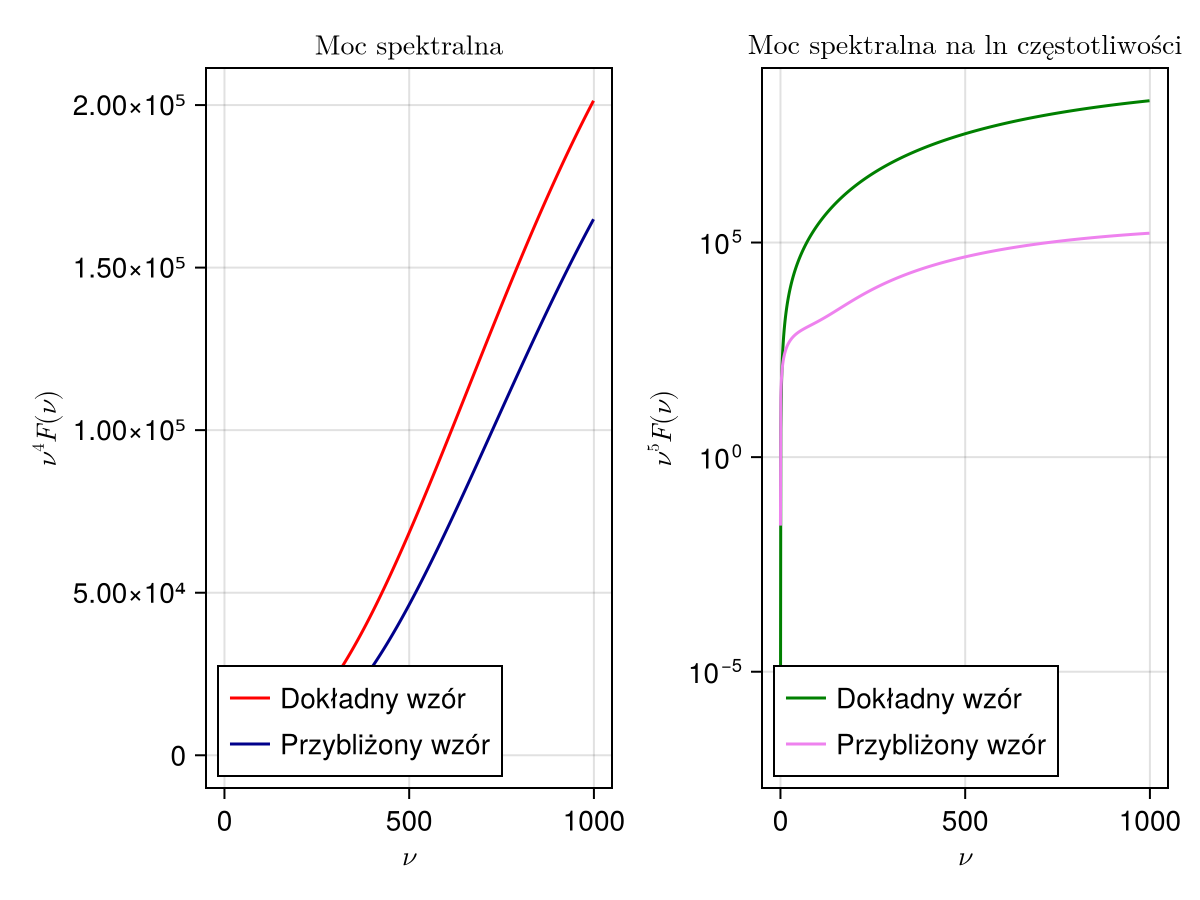

In [49]:
FIG

In [101]:
AXIS_MAX_F = Axis(FIG[2,1] , title = "Wykres maksymalnej częstości w zależności od e ", xlabel = L"e", ylabel = L"\nu_{max}")
l2 = lines!(ECC_RANGE, MAX_F_VECTOR, color = :purple)
s2 = scatter!([1.2,1.3,1.4,1.5, 1.7, 2.0], A, color = :cyan)
Legend(FIG[2,2],[l2,s2], [L"\text{Przybliżona wartość}\,\,\, \nu_{max}", L"\text{Numeryczna wartość}\,\,\, \nu_{max}"])

Legend()

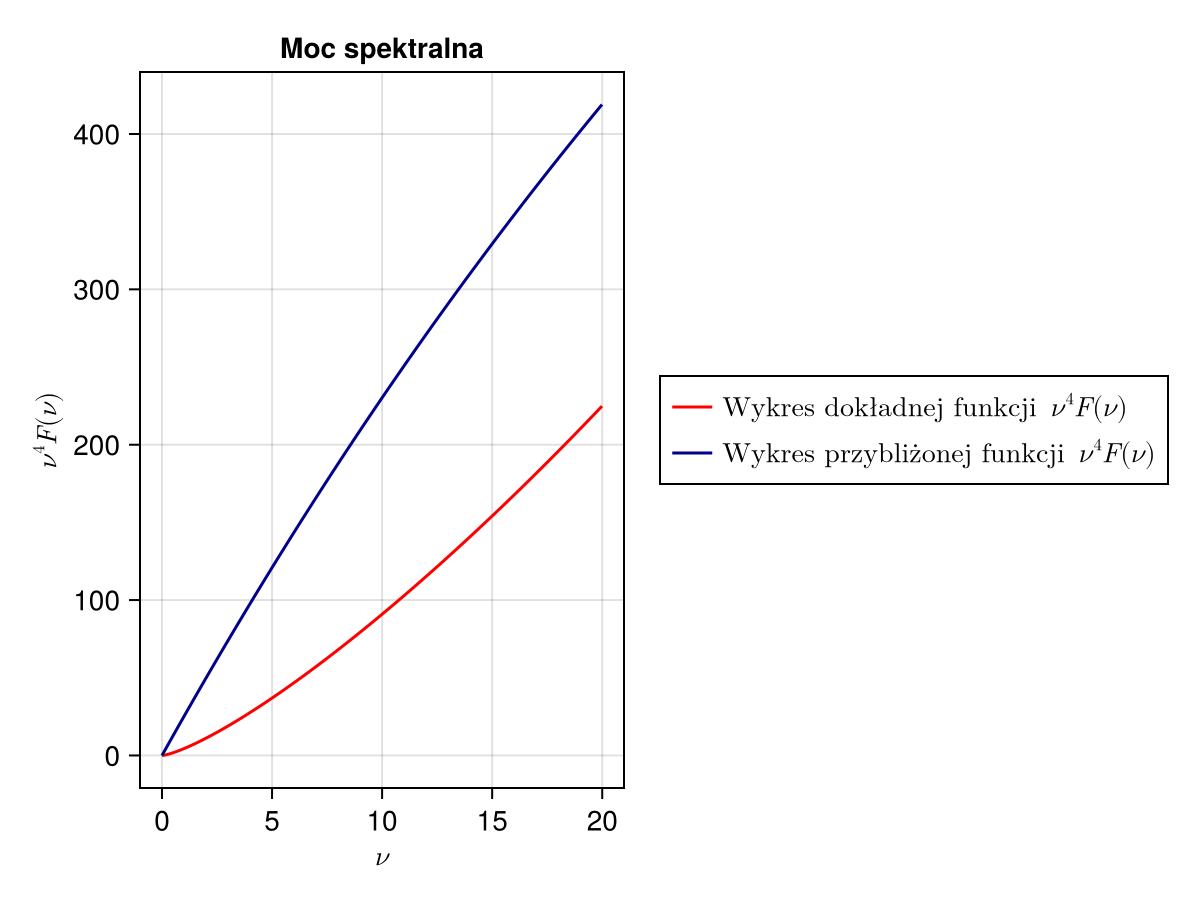

In [11]:
FIG

In [103]:
save("Moc.pdf",FIG)

CairoMakie.Screen{PDF}


Używając kontastu gęstosci (który zakłądamy jest rzędy wielkości większy od jedności):
$$ \delta_{c}(r) := \frac{\rho(r) - \bar{\rho}}{\bar{\rho}}  \approx \frac{\rho(r)}{\bar{\rho}}$$
$$ \rho(r) = \delta_{c}(r) f_{PBH} \rho_{DM} = \delta_{c}(r) f_{PBH} \Omega_{PBH} \rho_{crit}$$

Velocity Profil with cut-off:
$$
\begin{gather}
P = P_0 \left[\exp\left(-\frac{v^2}{\sigma^2_{disp}}\right) - \exp\left(-\frac{v^2_{vir}}{\sigma^2_{disp}}\right) \right] \\
\sim \exp\left(-\frac{v^2_{vir}}{\sigma^2_{disp}}\right) \left[\exp\left(-\frac{(v - v_{vir})(v+ v_{vir})}{\sigma^2_{disp}}\right) - 1 \right] \\
\sigma \sim \frac{v_{vir}}{\sqrt{2}} \\
P = P_0 e^{-2}\left[\exp\left(-2(\frac{v}{v_{vir}} - 1)(\frac{v}{v_{vir}}+ 1)\right) - 1 \right]
\end{gather}
$$

In [2]:
function Maxwell_Velocity_Distribution(v,p)
    V = p
    a = v/V - 1
    b = v/V + 1
    p = exp(-2*a*b) - 1
    return exp(-2)*p
end

Maxwell_Velocity_Distribution (generic function with 1 method)

In [3]:
V_VIR = 10
VELOCITY_RANGE = range(0.0, stop = V_VIR, length = 1000)
P_VECTOR = Maxwell_Velocity_Distribution.(VELOCITY_RANGE, V_VIR)

1000-element Vector{Float64}:
 0.8646647167633874
 0.8646627127593876
 0.8646567007714835
 0.8646466808719641
 0.8646326531813066
 0.8646146178681786
 0.8645925751494307
 0.8645665252900931
 0.8645364686033732
 0.8645024054506449
 0.8644643362414455
 0.8644222614334635
 0.8643761815325325
 ⋮
 0.006059638450497014
 0.005500551360091724
 0.004943112707167566
 0.00438732042667653
 0.0038331724419914995
 0.0032806666649855837
 0.0027298009961107894
 0.0021805733244772366
 0.0016329815279317974
 0.0010870234731370104
 0.0005426970156498724
 0.0

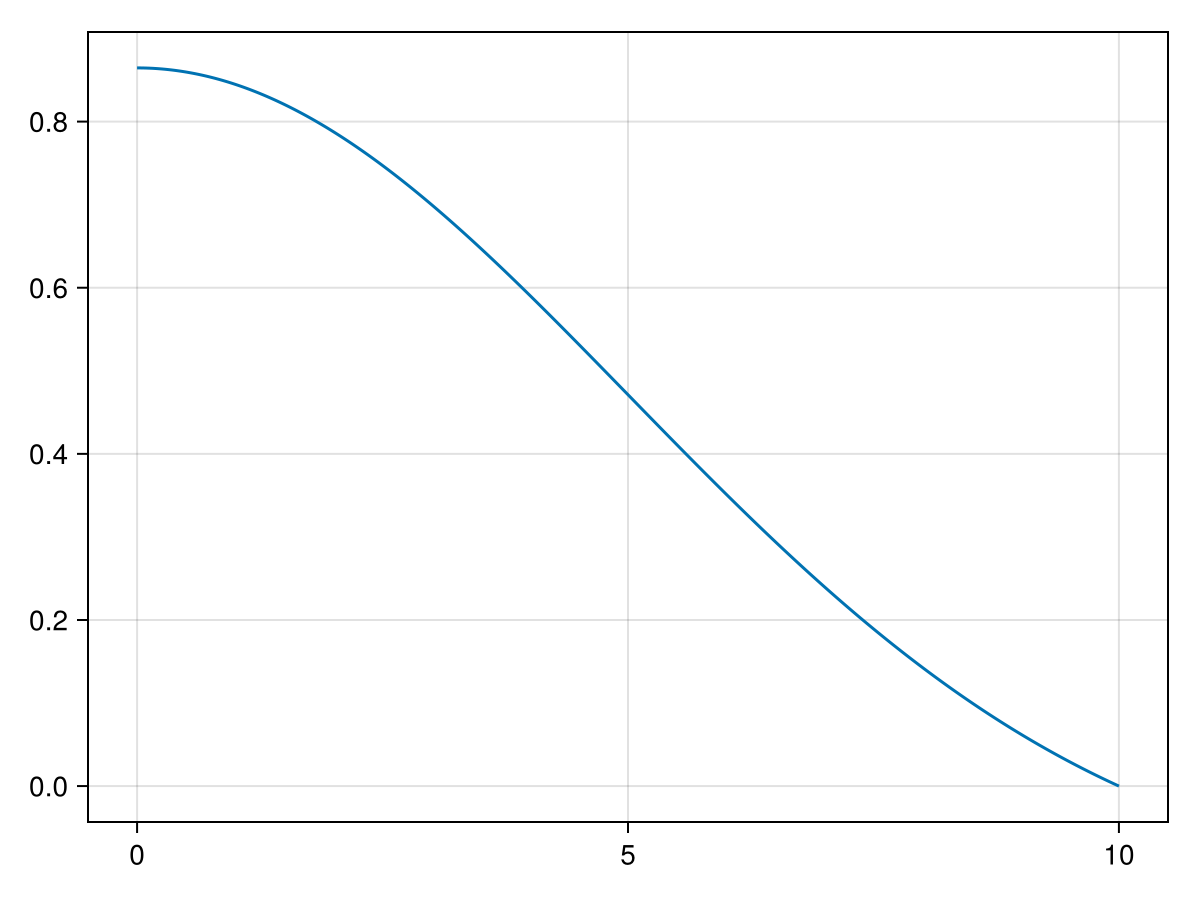

In [11]:
lines(VELOCITY_RANGE, P_VECTOR)

Integration Problem

In [5]:
DOMAIN = (0.0, V_VIR)

(0.0, 10)

In [6]:
int_problem = IntegralProblem(Maxwell_Velocity_Distribution , DOMAIN, V_VIR)

IntegralProblem. In-place: false


In [7]:
sol = solve(int_problem, QuadGKJL())

retcode: Success
u: 4.628087234246914

In [10]:
sol.u

4.628087234246914

# Wykresy dla orbit hiperbolicznych 

In [10]:
function Hyperbolic_Orbit(ϕ::Float64,a::Float64,e::Float64)
    p = a*(e^2 - 1.0)
    return p/(1 + e*cos(ϕ)) 
end    
function ϕ_max(e)
    return acos(- 1/e)
end
function ϕ_min(e)
    return - acos(- 1/e)
end

ϕ_min (generic function with 1 method)

In [12]:
ϕ1 = ϕ_max(1.1)
ϕ2 = ϕ_min(1.1)

-2.7118929874383686

In [13]:
ϕ_range = range(ϕ1, stop = ϕ2 ,length =100)
r_range = Hyperbolic_Orbit.(ϕ_range, 1.0, 1.1)

100-element Vector{Float64}:
 Inf
  7.896585039396508
  3.742750288316749
  2.374074350110421
  1.6998835062601447
  1.3023235811300764
  1.0422897933360606
  0.86028609166624
  0.7266475183444698
  0.6249524586039996
  0.5453906802716639
  0.4817509121208643
  0.4299160755228027
  ⋮
  0.4817509121208643
  0.5453906802716639
  0.6249524586039996
  0.7266475183444698
  0.86028609166624
  1.0422897933360606
  1.3023235811300764
  1.6998835062601447
  2.374074350110421
  3.742750288316749
  7.896585039396508
 Inf

In [18]:
Fig = Figure(size = (1000, 5000))
Ax = PolarAxis(Fig[1,1])
lines!(ϕ_range[2:99], r_range[2:99], color = :darkblue)

Lines{Tuple{Vector{Point{2, Float64}}}}

In [19]:
save("Polar_Axis.pdf", Fig)

CairoMakie.Screen{PDF}
